Sensitivity analysis for neutral cases in non-linear models Date: Dec 17, 2024

(48, 6)


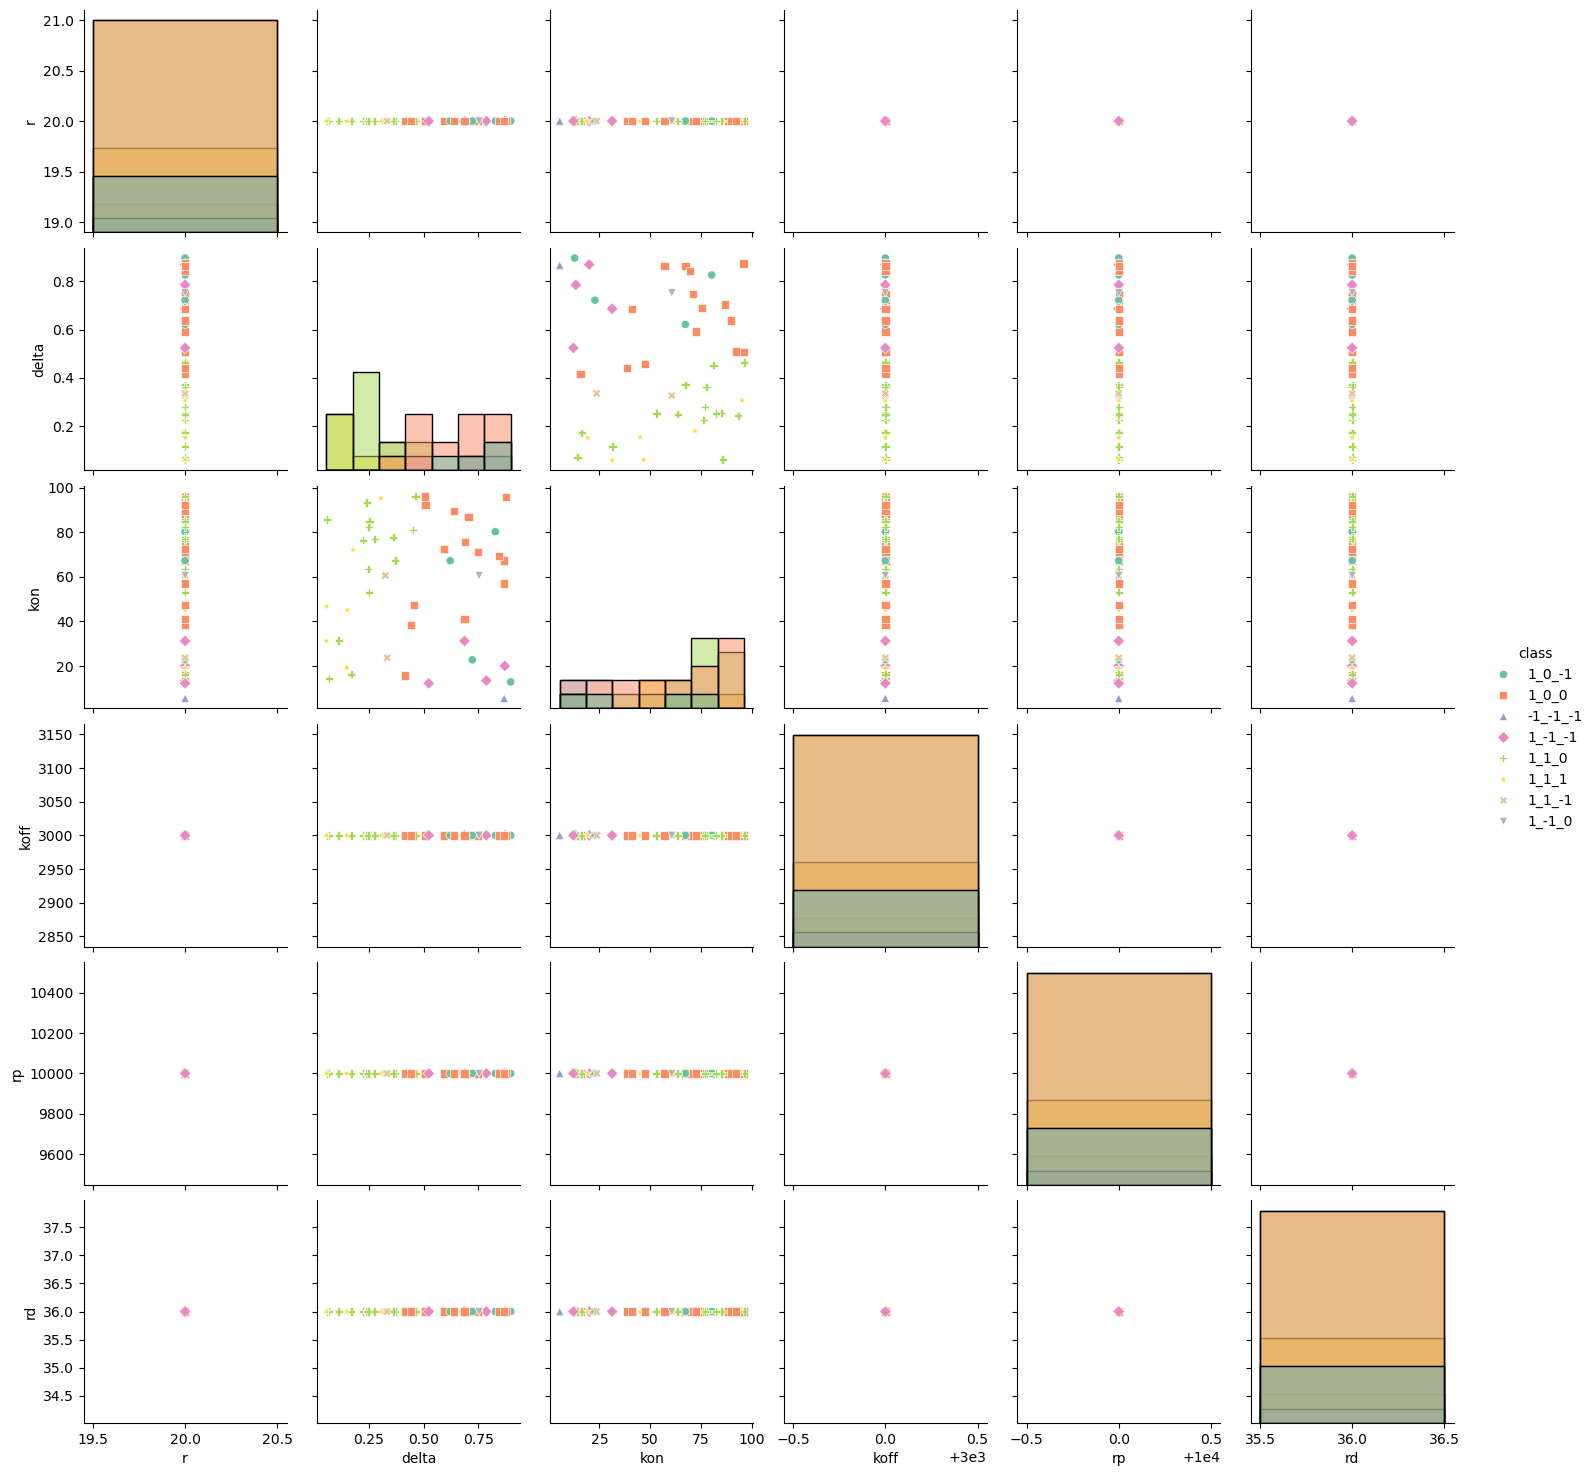

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load the dataset
df = pd.read_csv('param_protein_var.txt', delimiter='\t')

# Rename the first 6 columns with parameter names
df.columns.values[:6] = ['r', 'delta', 'kon', 'koff', 'rp', 'rd']

# Step 2: Extract features and target
X = df.iloc[:, :6]  # First 6 columns are now named parameters
y = df.iloc[:, -3:]  # Last 3 columns

print(X.shape)
# Create a categorical class label based on the unique combinations of -1, 0, 1
y_combined = y.apply(lambda row: '_'.join(map(str, row)), axis=1)
df['class'] = y_combined

# Step 3: Create pairplot with categorical classes
# Define a list of markers and colors for the 8 classes
markers = ['o', 's', '^', 'D', 'P', '*', 'X', 'v']  # 8 different markers
palette = sns.color_palette("Set2", n_colors=8)  # 8 different colors

sns.pairplot(df, 
             hue='class',
             vars=X.columns,  # Use actual column names from X
             palette=palette,  # Use the custom color palette
             diag_kind='hist',
             markers=markers)  # Use the custom markers 

This is the code to find out the number of class which gives protein variation (e.g., monotonic rise, peak, monotonic decrease) with significance for n number of data Date : Dec 20, 2024

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('param_protein_var.txt',delimiter='\t',header=None)
dq=pd.read_csv('sensitivity_simulation_results.txt',delimiter='\t',header=None)

# Step 2: Extract features and target
X = df.iloc[:, :6]  # First 6 columns are now named parameters
y = df.iloc[:, 6:]  # Last 3 columns

print(f'y=\n{y}')

# Create a copy of the slice instead of a view
Z = dq.iloc[:, 6:10].copy()

# Add two new columns as the ratio of the first and second columns
df['r/delta'] = df.iloc[:, 0] / df.iloc[:, 1]  # Ratio of 1st column to 2nd column
df['KD'] = (df.iloc[:, 1]+ df.iloc[:, 3]+df.iloc[:, 4])/ df.iloc[:, 2]  #KD'
df['beta'] = 1+(df.iloc[:, 4]/(df.iloc[:, 5]+df.iloc[:, 1])) #beta
df['approx.'] =df['r/delta']**2/ (df['r/delta']*(1+df['beta'] )+df['KD']) #E0(1+beta)+KD'

# Calculate max, min, and range for each row
Z['max'] = Z.max(axis=1)
Z['min'] = Z.min(axis=1)
Z['range'] = Z['max'] - Z['min']
fold=(Z['range']/Z['min'] )*100

#print(Z.iloc[:,0:4])

avg_I=X.iloc[:,0:4]
# Combine X, y, ratio_1, and ratio_2 along columns
combined_df = pd.concat([X, y, df[['r/delta', 'KD','beta','approx.']],Z['range'],fold], axis=1)
print("\nCombined DataFrame:")
print(combined_df)


# Print the updated DataFrame to a new file
combined_df.to_csv('r_delta_kd_competition.txt', sep='\t', index=False,header=['r', 'delta', 'kon', 'koff', 'rp', 'rd', '6', '7', '8', 'r/delta', 'KD', 'beta', 'approx-ratio', '(max-min)','fold']) 

# Print the first few rows of combined_df to check values
print("\nFirst few rows of Combined DataFrame:")
print(combined_df.head())  # This will show the actual values of ratio_1 and ratio_2



# Create a categorical class label based on the unique combinations of -1, 0, 1
y_combined = y.apply(lambda row: '_'.join(map(str, row)), axis=1)
df['class'] = y_combined

# Get unique classes and their counts
class_counts = df['class'].value_counts()
print("\nNumber of unique classes:", len(class_counts))
print("\nClass distribution:")
print(class_counts)

# Filter classes that contain at least one -1 element
classes_with_negative_one = df[df.isin([-1]).any(axis=1)]['class'].unique()
print("\nClasses with at least one -1 element:")
print(classes_with_negative_one)

# Print the corresponding fold values for these classes
for class_label in classes_with_negative_one:
    fold_values = combined_df[df['class'] == class_label]['fold']
    print(f"\nFold values for class '{class_label}':")
    print(fold_values)



# Create histogram of Z['range']
plt.figure(figsize=(10, 6))
sns.histplot(data=Z['range'], bins=30)
plt.title('Distribution of Range Values')
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()

y=
    6  7  8
0   1  0  0
1   1  0 -1
2   1  0  0
3  -1 -1 -1
4   1  0  0
5   1 -1 -1
6   1  1  0
7   1  0  0
8   1 -1 -1
9   1  0  0
10  1  1  0
11  1  1  1
12  1  0 -1
13  1  0  0
14  1  1  0
15  1  0  0
16  1  0  0
17  1  1  0
18  1  1  1
19  1  1  1
20  1  1  0
21  1  0  0
22  1  1  1
23  1  1  1
24  1  1  0
25  1  0 -1
26  1  0  0
27  1  0  0
28  1 -1 -1
29  1  0 -1
30  1  1  0
31  1  1  0
32  1  1 -1
33  1  1  0
34  1  1  0
35  1  0  0
36  1  0  0
37  1  1  1
38  1  1  0
39  1  1  0
40  1  1  0
41  1  1 -1
42  1  1  0
43  1  0  0
44  1 -1  0
45  1  0  0
46  1  1  0
47  1  0  0
48  1 -1 -1

Combined DataFrame:
     0         1         2     3      4   5  6  7  8     r/delta           KD  \
0   20  0.748461  58.83420  3000  10000  36  1  0  0   26.721499   220.972639   
1   20  0.896637  12.81760  3000  10000  36  1  0 -1   22.305571  1014.300387   
2   20  0.415130  15.66530  3000  10000  36  1  0  0   48.177679   829.886126   
3   20  0.866851   5.46342  3000  10000  36 -1 -1 -1

KeyError: 'fold'

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=pd.read_csv('param_protein_var.txt',delimiter='\t',header=None)
dq=pd.read_csv('sensitivity_simulation_results.txt',delimiter='\t',header=None)

# Step 2: Extract features and target
X = df.iloc[:, :6]  # First 6 columns are now named parameters
y = df.iloc[:, 6:]  # Last 3 columns

#print(f'y=\n{y}')

# Create a copy of the slice instead of a view
Z = dq.iloc[:, 6:10].copy()

# Add two new columns as the ratio of the first and second columns
df['r/delta'] = df.iloc[:, 0] / df.iloc[:, 1]  # Ratio of 1st column to 2nd column
df['KD'] = (df.iloc[:, 1]+ df.iloc[:, 3]+df.iloc[:, 4])/ df.iloc[:, 2]  #KD'
df['beta'] = 1+(df.iloc[:, 4]/(df.iloc[:, 5]+df.iloc[:, 1])) #beta
df['approx.'] =df['r/delta']**2/ (df['r/delta']*(1+df['beta'] )+df['KD']) #E0(1+beta)+KD'

# Calculate max, min, and range for each row
Z['max'] = Z.max(axis=1)
Z['min'] = Z.min(axis=1)
Z['range'] = Z['max'] - Z['min']
fold=(Z['range']/Z['min'] )*100

#print(Z.iloc[:,0:4])

avg_I=Z.iloc[:,0:4]
# Combine X, y, ratio_1, and ratio_2 along columns
combined_df = pd.concat([X, y, df[['r/delta', 'KD', 'beta', 'approx.']], Z['range'], fold, avg_I], axis=1)
combined_df.columns = ['r', 'delta', 'kon', 'koff', 'rp', 'rd', '6', '7', '8', 'r/delta', 'KD', 'beta', 'approx-ratio', '(max-min)', 'fold', 'avg_I_1', 'avg_I_2', 'avg_I_3', 'avg_I_4']  # Ensure correct column names
print("\nCombined DataFrame:")
#print(combined_df)


# Print the updated DataFrame to a new file
combined_df.to_csv('r_delta_kd_competition.txt', sep='\t', index=False, header=['r', 'delta', 'kon', 'koff', 'rp', 'rd', '6', '7', '8', 'r/delta', 'KD', 'beta', 'approx-ratio', '(max-min)', 'fold', 'avg_I_1', 'avg_I_2', 'avg_I_3', 'avg_I_4']) 

# Print the first few rows of combined_df to check values
print("\nFirst few rows of Combined DataFrame:")
print(combined_df.head().to_string())  # Improved formatting for better readability



# Create a categorical class label based on the unique combinations of -1, 0, 1
y_combined = y.apply(lambda row: '_'.join(map(str, row)), axis=1)
df['class'] = y_combined

# Get unique classes and their counts
class_counts = df['class'].value_counts()
print("\nNumber of unique classes:", len(class_counts))
print("\nClass distribution:")
print(class_counts.to_string())  # Improved formatting for better readability

# Filter classes that contain at least one -1 element
classes_with_negative_one = df[df.isin([-1]).any(axis=1)]['class'].unique()
print("\nClasses with at least one -1 element:")
print(classes_with_negative_one)

# Print the corresponding fold values for these classes
for class_label in classes_with_negative_one:
    fold_values = combined_df[df['class'] == class_label]['fold']
    print(f"\nFold values for class '{class_label}':")
    print(fold_values.to_string())  # Improved formatting for better readability



# Create histogram of Z['range']
plt.figure(figsize=(10, 6))
sns.histplot(data=Z['range'], bins=30)
plt.title('Distribution of Range Values')
plt.xlabel('Range')
plt.ylabel('Count')
plt.show()


Combined DataFrame:

First few rows of Combined DataFrame:
    r     delta       kon  koff     rp  rd  6  7  8    r/delta           KD        beta  approx-ratio  (max-min)       fold    avg_I_1    avg_I_2    avg_I_3    avg_I_4
0  20  0.748461  58.83420  3000  10000  36  1  0  0  26.721499   220.972639  273.120239      0.094626   0.967708   3.979668  24.316302  25.246006  25.284010  24.728153
1  20  0.896637  12.81760  3000  10000  36  1  0 -1  22.305571  1014.300387  272.027411      0.070033   1.300435   7.764186  17.682070  18.049582  17.717480  16.749147
2  20  0.415130  15.66530  3000  10000  36  1  0  0  48.177679   829.886126  275.611130      0.163961   2.934934   7.271011  40.364866  43.299800  43.111740  43.056525
3  20  0.866851   5.46342  3000  10000  36 -1 -1 -1  23.072016  2379.620613  272.246383      0.061299   2.870103  22.640626  15.546886  15.020622  14.120246  12.676783
4  20  0.704172  86.73030  3000  10000  36  1  0  0  28.402152   149.898065  273.448592      0.10153

AttributeError: 'list' object has no attribute 'to_string'